# PyTorchTuto_2.ipynb

## Author: Akshay Anand, PhD Candidate  
**Florida State University (2021 - 20XX)**
[*Github*](https://github.com/anand-me)
---

## Introduction  

Welcome to the second notebook in the PyTorch tutorial series! In this session, we will build upon the concepts introduced in the first notebook and dive deeper into PyTorch's capabilities.  

This notebook will focus on:  
1. **Autograd and Automatic Differentiation**  
   - Understanding Gradients  
   - Computational Graphs  
   - Gradients Tracking and Management  

By the end of this notebook, you will understand how PyTorch handles automatic differentiation, which is essential for training machine learning models.  

---

Let’s get started!

<a href="https://colab.research.google.com/github/anand-me/deep-learning-with-pytorch-tutorials/blob/main/src/PyTorchTuto_2.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

print("PyTorch version:", torch.__version__)

PyTorch version: 2.6.0+cu124


In [ ]:
# Setting seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Enable plots in the notebook
%matplotlib inline

In [ ]:
# ===================================
# 1. Understanding Gradients
# ===================================

print("\n" + "="*50)
print("1. UNDERSTANDING GRADIENTS")
print("="*50)


1. UNDERSTANDING GRADIENTS


In [ ]:
# Create a tensor with requires_grad=True to track computations
x = torch.tensor(2.0, requires_grad=True)
print(f"x = {x}, requires_grad = {x.requires_grad}")

x = 2.0, requires_grad = True


In [ ]:
# Perform a simple computation
y = x ** 2 + 3*x + 1
print(f"y = x^2 + 3x + 1 = {y}")

y = x^2 + 3x + 1 = 11.0


In [ ]:
# Compute the gradient dy/dx
y.backward()

In [ ]:
# Access the gradient
print(f"dy/dx at x=2 = {x.grad}")  # Should be 2x + 3 = 7 at x=2

dy/dx at x=2 = 7.0


In [ ]:
# Let's verify this analytically
def f(x_val):
    return x_val**2 + 3*x_val + 1

In [ ]:
def df_dx(x_val):
    return 2*x_val + 3

In [ ]:
x_val = 2.0
print(f"Analytical gradient at x=2: {df_dx(x_val)}")  # Should be 7

Analytical gradient at x=2: 7.0


In [ ]:
# Visualize the function and its gradient
x_range = np.linspace(-3, 3, 100)
y_range = [f(xi) for xi in x_range]
dy_dx_range = [df_dx(xi) for xi in x_range]

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

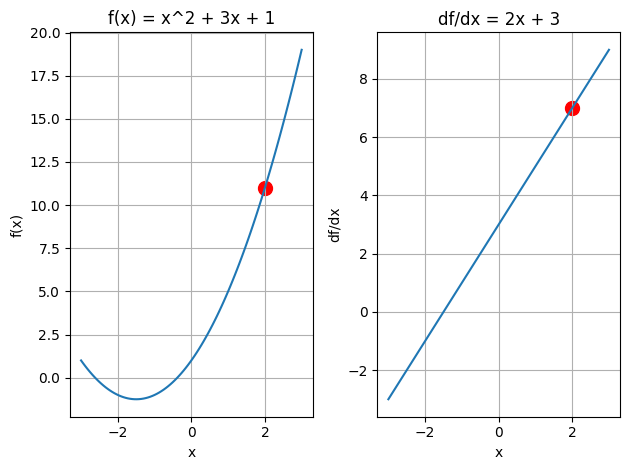

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(x_range, y_range)
plt.scatter([2], [f(2)], color='red', s=100)
plt.title('f(x) = x^2 + 3x + 1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_range, dy_dx_range)
plt.scatter([2], [df_dx(2)], color='red', s=100)
plt.title('df/dx = 2x + 3')
plt.xlabel('x')
plt.ylabel('df/dx')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Gradients with vector inputs and outputs
# Create a 2D input tensor
vec_x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
print(f"\nVector x: {vec_x}")


Vector x: tensor([1., 2., 3.], requires_grad=True)


In [ ]:
# Compute a scalar output (sum of squares)
vec_y = vec_x.pow(2).sum()
print(f"y = sum(x^2) = {vec_y}")

y = sum(x^2) = 14.0


In [ ]:
# Compute gradients
vec_y.backward()

In [ ]:
# The gradient is the vector [2*x_1, 2*x_2, 2*x_3]
print(f"Gradient dy/dx: {vec_x.grad}")  # Should be [2.0, 4.0, 6.0]

Gradient dy/dx: tensor([2., 4., 6.])


In [ ]:
# Multi-dimensional inputs and outputs
# Reset gradients
if vec_x.grad is not None:
    vec_x.grad.zero_()

In [ ]:
# Create a function with vector output
z = torch.stack([vec_x[0]**2, vec_x[1]**3, vec_x[2]**4])
print(f"\nVector output z: {z}")


Vector output z: tensor([ 1.,  8., 81.], grad_fn=<StackBackward0>)


In [ ]:
# For vector outputs, we need to specify a vector in the backward method
# This vector represents the gradient of a scalar function with respect to z
external_grad = torch.tensor([1.0, 1.0, 1.0])
z.backward(gradient=external_grad)

In [ ]:
# The result is a Jacobian-vector product
print(f"Gradient after backward with external gradient: {vec_x.grad}")

Gradient after backward with external gradient: tensor([0., 0., 0.])


In [ ]:
# ===================================
# 2. Computational Graphs
# ===================================

print("\n" + "="*50)
print("2. COMPUTATIONAL GRAPHS")
print("="*50)



2. COMPUTATIONAL GRAPHS


In [ ]:
# Reset the computation
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

In [ ]:
# Build a more complex computation graph
z = x**2 + y**3
print(f"z = x^2 + y^3 = {z}")

z = x^2 + y^3 = 31.0


In [ ]:
# Compute gradients
z.backward()

In [ ]:
# Access the gradients
print(f"dz/dx = {x.grad}")  # Should be 2*x = 4
print(f"dz/dy = {y.grad}")  # Should be 3*y^2 = 27

dz/dx = 4.0
dz/dy = 27.0


In [ ]:
# Let's visualize the computation graph
print("\nVisualization of the Computation Graph:")
print("x (input)       y (input)")
print("   |               |")
print("   |               |")
print("   v               v")
print("x^2              y^3")
print("   \\              /")
print("    \\            /")
print("     \\          /")
print("      \\        /")
print("       v      v")
print("        z = x^2 + y^3")
print("             |")
print("             |")
print("             v")
print("       backward()")

# Retaining the computation graph
print("\nRetaining the computation graph:")


Visualization of the Computation Graph:
x (input)       y (input)
   |               |
   |               |
   v               v
x^2              y^3
   \              /
    \            /
     \          /
      \        /
       v      v
        z = x^2 + y^3
             |
             |
             v
       backward()

Retaining the computation graph:


In [ ]:
# Reset our variables
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)
z = x**2 + y**3

In [ ]:
# Backward pass with retain_graph=True to keep the graph in memory
z.backward(retain_graph=True)
print(f"First backward pass: dz/dx = {x.grad}, dz/dy = {y.grad}")

First backward pass: dz/dx = 4.0, dz/dy = 27.0


In [ ]:
# Reset gradients
x.grad.zero_()
y.grad.zero_()

tensor(0.)

In [ ]:
# Run backward again
z.backward()
print(f"Second backward pass: dz/dx = {x.grad}, dz/dy = {y.grad}")

Second backward pass: dz/dx = 4.0, dz/dy = 27.0


In [ ]:
# Detaching tensors from the computation graph
print("\nDetaching tensors from the computation graph:")


Detaching tensors from the computation graph:


In [ ]:
# Reset our variables
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

In [ ]:
# Detach y from the computation graph
y_detached = y.detach()
print(f"y = {y}, requires_grad = {y.requires_grad}")
print(f"y_detached = {y_detached}, requires_grad = {y_detached.requires_grad}")

y = 3.0, requires_grad = True
y_detached = 3.0, requires_grad = False


In [ ]:
# Compute using the detached tensor
z = x**2 + y_detached**3
print(f"z = x^2 + y_detached^3 = {z}")
z.backward()

z = x^2 + y_detached^3 = 31.0


In [ ]:
# Only x has gradient now
print(f"dz/dx = {x.grad}")
print(f"y.grad = {y.grad}")  # None or unchanged

dz/dx = 4.0
y.grad = None


In [ ]:
# Setting requires_grad on existing tensors
a = torch.tensor([1.0, 2.0, 3.0])
print(f"\na = {a}, requires_grad = {a.requires_grad}")


a = tensor([1., 2., 3.]), requires_grad = False


In [ ]:
# Set requires_grad=True
a.requires_grad_(True)
print(f"After requires_grad_(): a = {a}, requires_grad = {a.requires_grad}")

After requires_grad_(): a = tensor([1., 2., 3.], requires_grad=True), requires_grad = True


In [ ]:
# ===================================
# 3. Backpropagation
# ===================================

print("\n" + "="*70)
print("3. BACKPROPAGATION => Linear Regression with Autograd")
print("="*70)


3. BACKPROPAGATION => Linear Regression with Autograd


In [ ]:
# Example: Linear Regression with Autograd
print("\nLinear Regression Example with Autograd:")


Linear Regression Example with Autograd:


In [ ]:
# Generate some data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 3 * X + 2 + 0.1 * np.random.randn(100, 1)  # y = 3x + 2 + noise

In [ ]:
# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

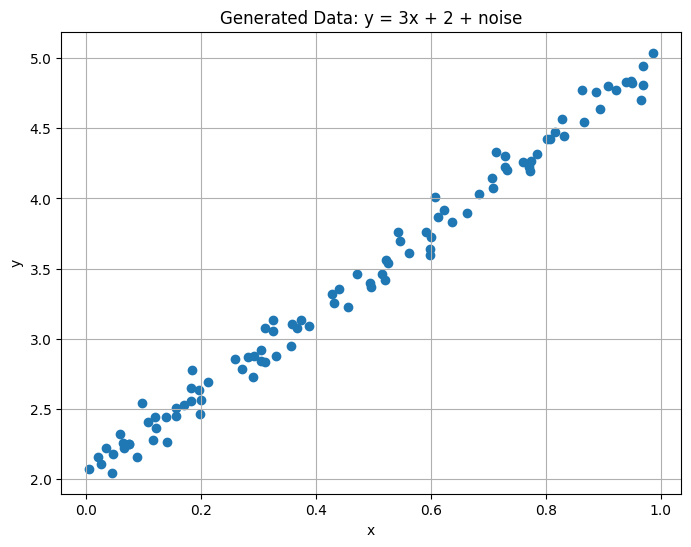

In [ ]:
# lets visualize the random data
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.title('Generated Data: y = 3x + 2 + noise')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [ ]:
# Initialize parameters with requires_grad=True
w = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [ ]:
# Hyperparameters
learning_rate = 0.1
n_epochs = 100

In [ ]:
# Lists to store values for plotting
loss_history = []
w_history = []
b_history = []

# Training loop
for epoch in range(n_epochs):
    # Forward pass
    y_pred = w * X_tensor + b

    # Compute loss (mean squared error)
    loss = ((y_pred - y_tensor) ** 2).mean()
    loss_history.append(loss.item())

    # Store current parameter values
    w_history.append(w.item())
    b_history.append(b.item())

    # Backward pass
    loss.backward()

    # Update parameters using gradient descent
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # Zero gradients after updating parameters
        w.grad.zero_()
        b.grad.zero_()

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}, w: {w.item():.4f}, b: {b.item():.4f}")

print(f"\nFinal parameters: w = {w.item():.4f}, b = {b.item():.4f}")
print(f"True parameters: w = 3, b = 2")

Epoch 10/100, Loss: 0.0081, w: 2.9540, b: 2.0215
Epoch 20/100, Loss: 0.0081, w: 2.9540, b: 2.0215
Epoch 30/100, Loss: 0.0081, w: 2.9540, b: 2.0215
Epoch 40/100, Loss: 0.0081, w: 2.9540, b: 2.0215
Epoch 50/100, Loss: 0.0081, w: 2.9540, b: 2.0215
Epoch 60/100, Loss: 0.0081, w: 2.9540, b: 2.0215
Epoch 70/100, Loss: 0.0081, w: 2.9540, b: 2.0215
Epoch 80/100, Loss: 0.0081, w: 2.9540, b: 2.0215
Epoch 90/100, Loss: 0.0081, w: 2.9540, b: 2.0215
Epoch 100/100, Loss: 0.0081, w: 2.9540, b: 2.0215

Final parameters: w = 2.9540, b = 2.0215
True parameters: w = 3, b = 2


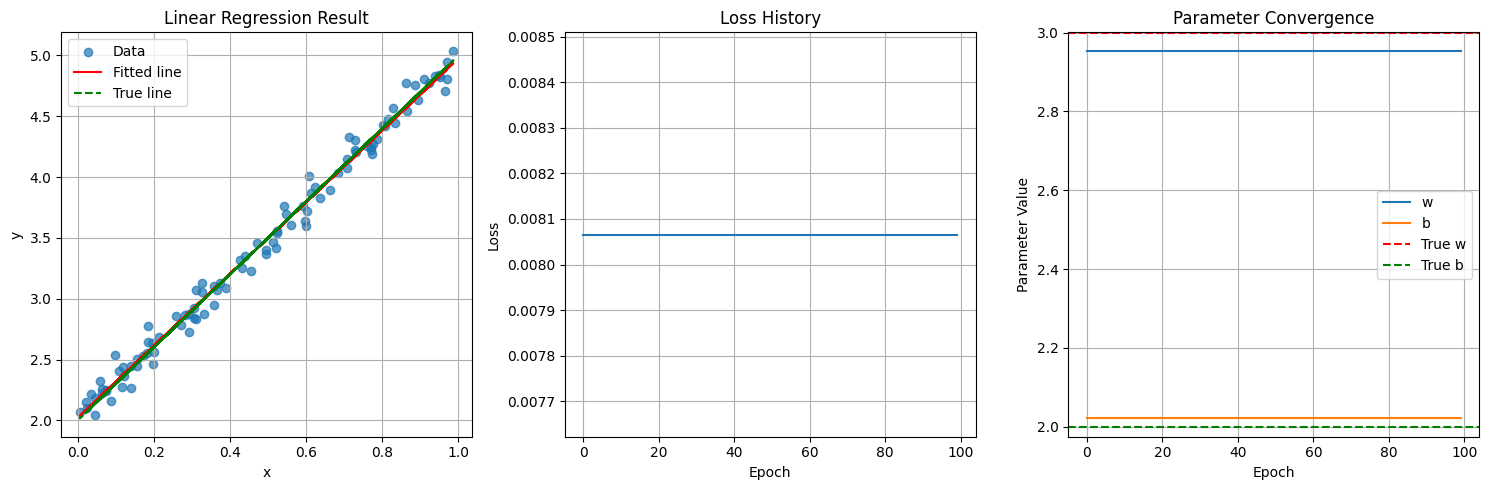

In [ ]:
# lets visulaize the results
plt.figure(figsize=(15, 5))

# Plot 1: Data and fitted line
plt.subplot(1, 3, 1)
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X, w.item() * X + b.item(), 'r', label='Fitted line')
plt.plot(X, 3 * X + 2, 'g--', label='True line')
plt.title('Linear Regression Result')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Plot 2: Loss history
plt.subplot(1, 3, 2)
plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot 3: Parameter convergence
plt.subplot(1, 3, 3)
plt.plot(w_history, label='w')
plt.plot(b_history, label='b')
plt.axhline(y=3, color='r', linestyle='--', label='True w')
plt.axhline(y=2, color='g', linestyle='--', label='True b')
plt.title('Parameter Convergence')
plt.xlabel('Epoch')
plt.ylabel('Parameter Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# ===================================
# 3. Backpropagation
# ===================================

print("\n" + "="*50)
print(" Neural Network with Autograd")
print("="*50)


 Neural Network with Autograd


In [ ]:
# Example: Neural Network with Autograd
print("\nNeural Network Example with Autograd:")


Neural Network Example with Autograd:


In [ ]:
# Generate some non-linear data
np.random.seed(42)
X = np.random.rand(200, 1) * 10 - 5  # Range: -5 to 5
y = 0.2 * X**3 + 0.5 * X**2 - 2 * X + 3 + 2 * np.random.randn(200, 1)  # Non-linear with noise
# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

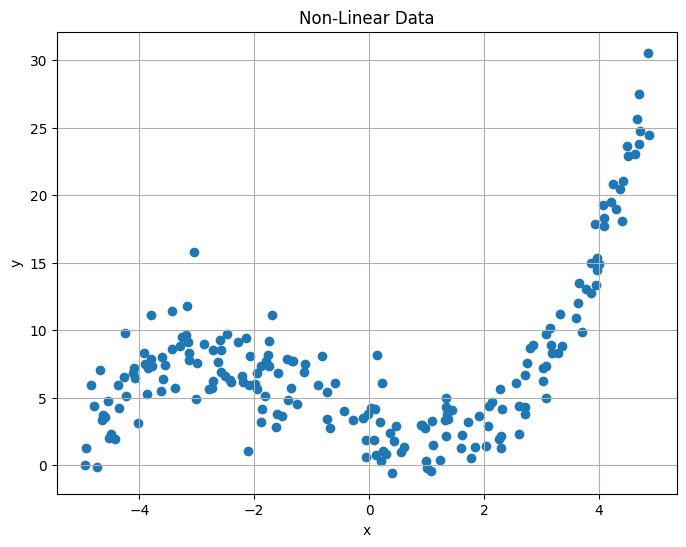

In [ ]:
# visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.title('Non-Linear Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [ ]:
# Initialize parameters for a 2-layer neural network
input_size = 1
hidden_size = 10
output_size = 1

In [ ]:
# Layer 1
W1 = torch.randn(input_size, hidden_size, requires_grad=True)
b1 = torch.zeros(hidden_size, requires_grad=True)

# Layer 2
W2 = torch.randn(hidden_size, output_size, requires_grad=True)
b2 = torch.zeros(output_size, requires_grad=True)

In [ ]:
# Hyperparameters
learning_rate = 0.01
n_epochs = 1000

In [ ]:
# Lists to store values for plotting
loss_history = []

# Training loop
for epoch in range(n_epochs):
    # Forward pass
    # Layer 1
    h = torch.tanh(X_tensor @ W1 + b1)

    # Layer 2
    y_pred = h @ W2 + b2

    # Compute loss (mean squared error)
    loss = ((y_pred - y_tensor) ** 2).mean()
    loss_history.append(loss.item())

    # Backward pass
    loss.backward()

    # Update parameters using gradient descent
    with torch.no_grad():
        W1 -= learning_rate * W1.grad
        b1 -= learning_rate * b1.grad
        W2 -= learning_rate * W2.grad
        b2 -= learning_rate * b2.grad

        # Zero gradients after updating parameters
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()

    # Print progress
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}")

print(f"\nFinal loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 21.7513
Epoch 200/1000, Loss: 11.3676
Epoch 300/1000, Loss: 7.2200
Epoch 400/1000, Loss: 5.7175
Epoch 500/1000, Loss: 5.9816
Epoch 600/1000, Loss: 5.5678
Epoch 700/1000, Loss: 5.3348
Epoch 800/1000, Loss: 5.1732
Epoch 900/1000, Loss: 5.0419
Epoch 1000/1000, Loss: 4.9218

Final loss: 4.9218


In [ ]:
# Evaluating our model
with torch.no_grad():
    # Sorting X for smooth plotting
    sorted_indices = torch.argsort(X_tensor.squeeze())
    X_sorted = X_tensor[sorted_indices]
    y_sorted = y_tensor[sorted_indices]

    # Forward pass
    h = torch.tanh(X_sorted @ W1 + b1)
    y_pred_sorted = h @ W2 + b2

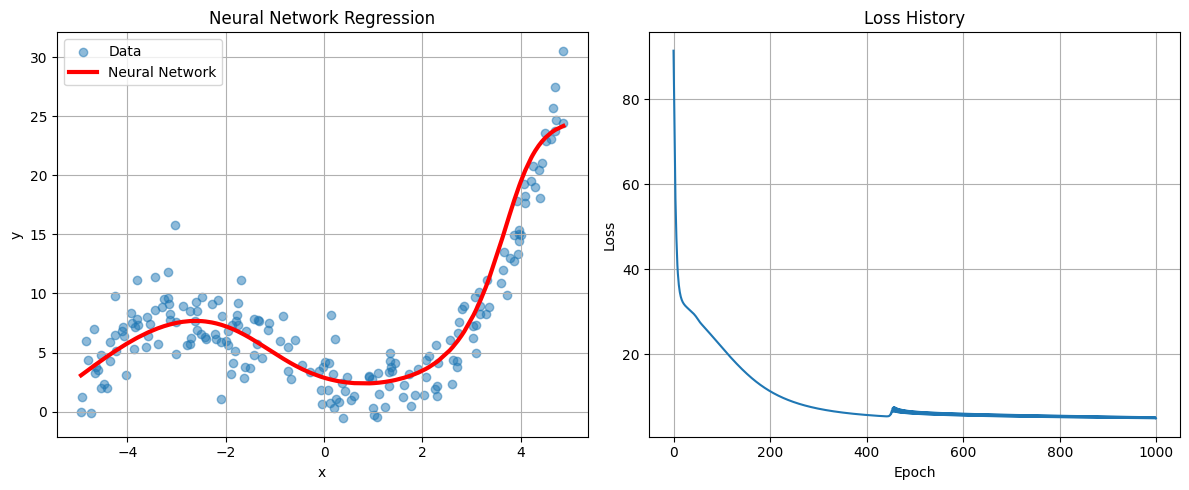

In [ ]:
# Plot the results
plt.figure(figsize=(12, 5))

# Plot 1: Data and fitted curve
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X_sorted.numpy(), y_pred_sorted.numpy(), 'r', linewidth=3, label='Neural Network')
plt.title('Neural Network Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Plot 2: Loss history
plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# ===================================
# 3. Backpropagation
# ===================================

print("\n" + "="*50)
print(" Computing higher-order derivatives")
print("="*50)


 Computing higher-order derivatives


In [ ]:
# Create tensor
x = torch.tensor(2.0, requires_grad=True)

In [ ]:
# First function: f(x) = x^3
y = x**3
print(f"f(x) = x^3 = {y}")

f(x) = x^3 = 8.0


In [ ]:
# First derivative: f'(x) = 3x^2
y.backward(retain_graph=True)
first_derivative = x.grad
print(f"f'(x) = 3x^2 = {first_derivative}")  # Should be 12 at x=2

f'(x) = 3x^2 = 12.0


In [ ]:
# Reset gradient
x.grad.zero_()

tensor(0.)

In [ ]:
# Compute second derivative by taking gradient of the first derivative
# We need to create a new computation graph for the first derivative
z = 3 * x**2
z.backward()
second_derivative = x.grad
print(f"f''(x) = 6x = {second_derivative}")  # Should be 12 at x=2

f''(x) = 6x = 12.0


In [ ]:
# Handling gradient accumulation and no_grad context
print("\nGradient Accumulation and no_grad Examples:")


Gradient Accumulation and no_grad Examples:


In [ ]:
# Reset our variable
x = torch.tensor(2.0, requires_grad=True)
print(f"Initial x: {x}, grad: {x.grad}")

Initial x: 2.0, grad: None


In [ ]:
# Compute gradients multiple times without zeroing
y1 = x**2
y1.backward(retain_graph=True)
print(f"After first backward: x.grad = {x.grad}")  # Should be 4

After first backward: x.grad = 4.0


In [ ]:
y2 = x**3
y2.backward(retain_graph=True)
print(f"After second backward: x.grad = {x.grad}")  # Should be 4 + 12 = 16 (accumulated)

After second backward: x.grad = 16.0


In [ ]:
# Reset gradient
x.grad.zero_()
print(f"After zeroing: x.grad = {x.grad}")

# Using torch.no_grad to temporarily disable gradient tracking
with torch.no_grad():
    y3 = x**4
    print(f"Inside no_grad: y3 = {y3}, y3.requires_grad = {y3.requires_grad}")


After zeroing: x.grad = 0.0
Inside no_grad: y3 = 16.0, y3.requires_grad = False


In [ ]:
# Gradient tracking is re-enabled outside the context
y4 = x**4
print(f"Outside no_grad: y4 = {y4}, y4.requires_grad = {y4.requires_grad}")

Outside no_grad: y4 = 16.0, y4.requires_grad = True


In [ ]:
# Using torch.set_grad_enabled
torch.set_grad_enabled(False)
y5 = x**5
print(f"With grad disabled: y5 = {y5}, y5.requires_grad = {y5.requires_grad}")

With grad disabled: y5 = 32.0, y5.requires_grad = False


In [ ]:
torch.set_grad_enabled(True)
y6 = x**5
print(f"With grad re-enabled: y6 = {y6}, y6.requires_grad = {y6.requires_grad}")

With grad re-enabled: y6 = 32.0, y6.requires_grad = True


In [ ]:
print("\n" + "="*60)
print(" Autograd and Automatic Differentiation Tutorial Completed!")
print("="*60)


 Autograd and Automatic Differentiation Tutorial Completed!
